## データに関してのメモ

https://www.kaggle.com/c/google-quest-challenge/data

- StackExchange : 様々な分野のトピックについて質疑応答 (Q&A) 形式で議論できるウェブサイト群
- ラベルは30個で、0~1までの連続値を予測してください
  - 連続値とは言うものの、取りうる値は何種類しかないので、実質分類問題でも解けると思う
  - どっちがいいのかは調べてみないと分からない...
- urlの情報をどうやって使うか...?

### 評価指標
- カラムごとのスピアマン相関係数の平均
  - カラムごとに正解ラベルと予想ラベルについて相関をとって求める感じ
- 後処理が必要、中郷さんのディスカッションが参考になる
  - 同じ値の順番も再現するとスコアが上がる
- https://www.kaggle.com/c/google-quest-challenge/discussion/118724

## CV
- CVに関する議論
  - https://www.kaggle.com/ratthachat/quest-cv-analysis-on-different-splitting-methods
  - データが少ないからCVの方が大事
- K-foldsはよくない
  - 同じ質問が訓練データに含まれていて、過大評価してしまう
- GroupKFoldはNUM_FOLDS=5だと良い
  - 同じ値しかないとスピアマン相関係数がNanになるので、NUM_FOLDSに注意が必要
- MultilabelStratifiedKFoldは、リークの問題がある
  - スクリプトは以下で使えるとのこと
  - https://github.com/trent-b/iterative-stratification

### 訓練データ
- 訓練データには、同じ質問の行が含まれている (もちろん異なる回答)
  - CVは気をつけよう

### テストデータ
- テストデータには、同じ質問の行はない
- テストデータがかなり少ない
- ラベルの種類
  - question関連 (21)
    - type_entity
    - type_choice
    - type_compare
    - type_spelling
    - type_definition
    - type_procedure
    - type_consequence
    - type_instructions
    - type_reason_explanation
    - multi_intent 
    - well_written
    - fact_seeking
    - opinion_seeking
    - body_critical ()
    - conversational
    - interestingness_self
    - interestingness_others
    - expect_short_answer
    - not_really_a_question
    - has_commonly_accepted_answer
    - asker_intent_understanding
  - answer関連 (10)
    - type_procedure
    - type_instructions
    - type_reason_explanation
    - relevance
    - helpful
    - plausible
    - well_written
    - satisfaction
    - level_of_information

## データの全体ざっと確認

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from os import path

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
BASE_PATH = '../dataset/raw'

train = pd.read_csv(path.join(BASE_PATH, 'train.csv'))
test = pd.read_csv(path.join(BASE_PATH, 'test.csv'))

print('Train shape :', train.shape)
print('Test shape :', test.shape)

Train shape : (6079, 41)
Test shape : (476, 11)


In [3]:
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,0.000000,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.333333,0.333333,0.0,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [4]:
test.head(30)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com
5,245,Exactly how are Avenger elites buffed when one...,I understand that elites with the Avenger prop...,Sterno,https://gaming.stackexchange.com/users/3062,\n Only Champion monster types will spawn wit...,ayckoster,https://gaming.stackexchange.com/users/10933,http://gaming.stackexchange.com/questions/7041...,CULTURE,gaming.stackexchange.com
6,257,Configure which plugin custom post types get r...,I am writing a plugin that creates custom post...,Rabbott,https://wordpress.stackexchange.com/users/35459,\n The issue i'm having is that custom post t...,RRikesh,https://wordpress.stackexchange.com/users/17305,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
7,267,"Why say ""it rhymes with Grape""?",There is a scene in 21 Jumpstreet where Dave F...,Kevin Howell,https://movies.stackexchange.com/users/645,Opinion: It was a funny(?) joke.\n\nAlthough a...,Andrew Martin,https://movies.stackexchange.com/users/8219,http://movies.stackexchange.com/questions/2109...,LIFE_ARTS,movies.stackexchange.com
8,284,c++ getline and stringstream,"I'm trying to read in a file, which has 5 line...",wfmn17,https://stackoverflow.com/users/1430743,If &gt;&gt; sees that there is nothing left in...,Aasmund Eldhuset,https://stackoverflow.com/users/626853,http://stackoverflow.com/questions/16374187/c-...,STACKOVERFLOW,stackoverflow.com
9,292,"Outlook doesn't download all emails, whereas i...","When I check my emails on my iPhone, I notice ...",Samantha,https://superuser.com/users/148771,It could be that your iPhone is deleting the m...,Tanner Faulkner,https://superuser.com/users/146694,http://superuser.com/questions/454556,TECHNOLOGY,superuser.com


## 後処理のためのラベルの値の確認

In [5]:
# ラベルの種類
label = list(set(train.columns) - set(test.columns))
print(len(label))
label

30


['question_type_definition',
 'answer_well_written',
 'question_expect_short_answer',
 'question_asker_intent_understanding',
 'question_interestingness_self',
 'answer_level_of_information',
 'answer_plausible',
 'question_type_consequence',
 'question_body_critical',
 'question_fact_seeking',
 'answer_relevance',
 'question_well_written',
 'question_multi_intent',
 'question_has_commonly_accepted_answer',
 'question_type_spelling',
 'question_not_really_a_question',
 'question_type_instructions',
 'answer_type_reason_explanation',
 'question_type_reason_explanation',
 'question_type_entity',
 'question_type_choice',
 'answer_helpful',
 'answer_satisfaction',
 'question_opinion_seeking',
 'answer_type_procedure',
 'question_conversational',
 'question_type_procedure',
 'question_type_compare',
 'question_interestingness_others',
 'answer_type_instructions']

In [6]:
# 5, 9, 17のいづれか (3はあるけど、実質5だと思う)
for col in label:
    uniq_val = train[col].unique()
    print('col_name : {0}, type {1}, values: {2}'.format(
        col, len(uniq_val), ','.join(list(map(str, uniq_val)))))

col_name : question_type_definition, type 5, values: 0.0,0.3333333333333333,0.5,1.0,0.6666666666666666
col_name : answer_well_written, type 9, values: 1.0,0.8888888888888888,0.7777777777777778,0.8333333333333334,0.6666666666666666,0.5,0.5555555555555556,0.4444444444444444,0.3333333333333333
col_name : question_expect_short_answer, type 5, values: 0.0,0.5,1.0,0.3333333333333333,0.6666666666666666
col_name : question_asker_intent_understanding, type 9, values: 1.0,0.8888888888888888,0.8333333333333334,0.7777777777777778,0.6666666666666666,0.5555555555555556,0.3333333333333333,0.4444444444444444,0.5
col_name : question_interestingness_self, type 9, values: 1.0,0.4444444444444444,0.6666666666666666,0.3333333333333333,0.7777777777777778,0.5555555555555556,0.8888888888888888,0.5,0.8333333333333334
col_name : answer_level_of_information, type 9, values: 0.6666666666666666,0.5555555555555556,0.3333333333333333,0.7777777777777778,0.5,0.8333333333333334,1.0,0.4444444444444444,0.8888888888888888


In [7]:
sorted(train['question_expect_short_answer'].unique())

[0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]

## Category の確認

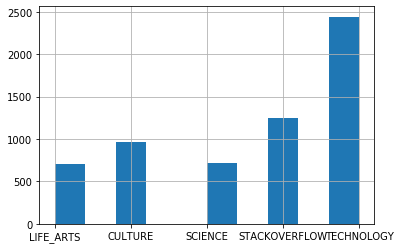

In [8]:
train['category'].hist()